In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [3]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
target = boston.target

In [6]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

C:\Users\Icon\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


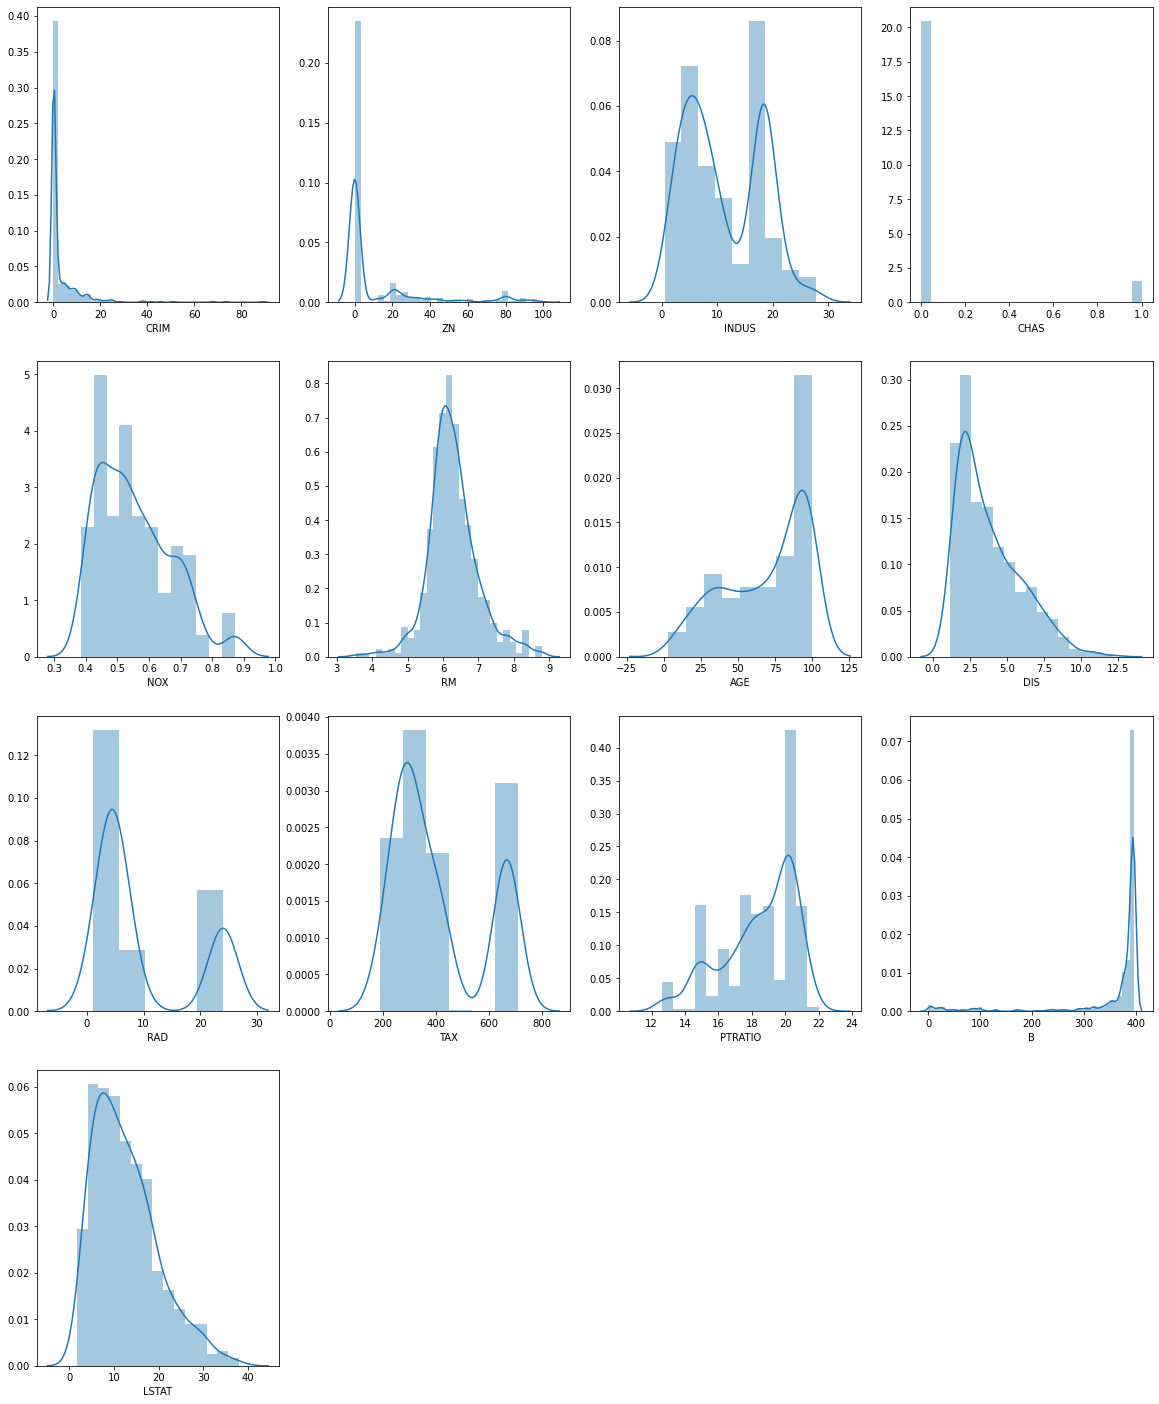

In [8]:
plt.figure(figsize=(20,25))
plotnumber = 1
for column in features:
    if plotnumber <= 14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(features[column])
    plotnumber += 1

In [9]:
x = features
y = target

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=355)

In [11]:
from sklearn.ensemble import RandomForestRegressor
rand_clf = RandomForestRegressor(random_state=6)

In [12]:
rand_clf.fit(x_train, y_train)

RandomForestRegressor(random_state=6)

In [13]:
rand_clf.score(x_test, y_test)

0.8843800512856986

In [22]:
# we are tuning hyperparameters right now

grid_param = {
    'n_estimators': [90,100,115],
    'criterion': ['mse', 'mae'],
    'min_samples_split': [4,5,6,7,8],
    'min_samples_leaf': [1,2,3,4,5],
    'max_features': ['auto', 'log2', 'sqrt']
}

In [23]:
from sklearn.model_selection import GridSearchCV
rand_grid = GridSearchCV(estimator=rand_clf, param_grid=grid_param, cv=5, n_jobs=-1, verbose=3)

In [24]:
rand_grid.fit(x_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 11.0min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [26]:
rand_grid.best_params_

{'criterion': 'mae',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 115}

In [28]:
rand_clf = RandomForestRegressor(n_estimators=115, criterion='mae', min_samples_split=4, min_samples_leaf=1, max_features='log2')

In [29]:
rand_clf.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_features='log2', min_samples_split=4,
                      n_estimators=115)

In [30]:
rand_clf.score(x_test, y_test)

0.8749280963517647

In [33]:
def adj_r2(x, y):
    r2 = rand_clf.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1) 
    return adjusted_r2

In [34]:
adj_r2(x_test, y_test)

0.863145960500844